In [2]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

<Figure size 1500x300 with 0 Axes>

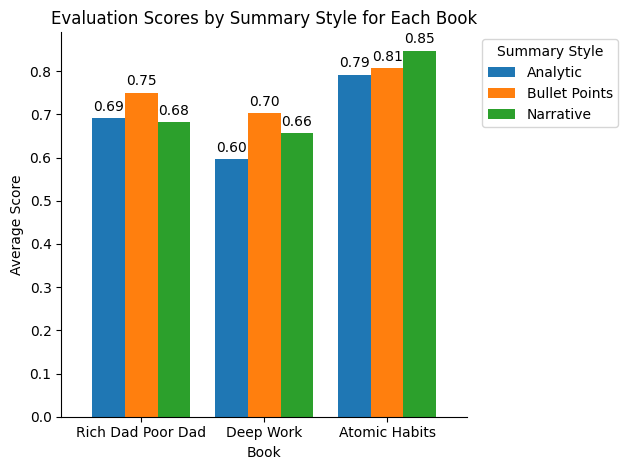

In [9]:
book_dir = 'outputs/Self-Development'

# Get all book folders
book_folders = [f for f in os.listdir(book_dir) if os.path.isdir(os.path.join(book_dir, f))]

# Initialize lists to store data for plotting
books = []
analytic_scores = []
bullet_scores = []
narrative_scores = []

# Loop through each book folder
for book in book_folders:
    book_path = os.path.join(book_dir, book)
    
    # Initialize scores for this book
    book_scores = {'analytic': 0, 'bullet_points': 0, 'narrative': 0}
    
    # Process each summary style
    for style in ['analytic', 'bullet_points', 'narrative']:
        file_path = os.path.join(book_path, f'eval_results_{style}.json')
        
        if os.path.exists(file_path):
            with open(file_path, 'r') as f:
                data = json.load(f)
                
            # Calculate average score
            scores = [item['score'] for item in data.values()]
            avg_score = sum(scores) / len(scores)
            book_scores[style] = avg_score
    
    # Store data for plotting
    books.append(book)
    analytic_scores.append(book_scores['analytic'])
    bullet_scores.append(book_scores['bullet_points'])
    narrative_scores.append(book_scores['narrative'])

# Create DataFrame for plotting
df = pd.DataFrame({
    'Book': books,
    'Analytic': analytic_scores,
    'Bullet Points': bullet_scores,
    'Narrative': narrative_scores
})

# Plot grouped bar chart
plt.figure(figsize=(15, 3))
ax = df.set_index('Book').plot(kind='bar', width=0.8)
plt.title('Evaluation Scores by Summary Style for Each Book')
plt.xlabel('Book')
plt.ylabel('Average Score')

# Center the x-axis labels
plt.xticks(rotation=0, ha='center')

# Add score values on top of each bar
for i, container in enumerate(ax.containers):
    for j, patch in enumerate(container):
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width()/2., height + 0.01,
                f'{height:.2f}',
                ha='center', va='bottom')

# Move legend to upper right corner
plt.legend(title='Summary Style', bbox_to_anchor=(1.02, 1), loc='upper left')

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout to prevent legend cutoff
plt.tight_layout()
plt.show()
